# Analyse Exploratoire du Catalogue Netflix
## Dataset: Netflix Movies & TV Shows (8,807 titres)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

### 1. Exploration du dataset

#### Chargement des données

In [5]:
df = pd.read_csv('netflix_titles.csv')

#### 1.2 Aperçu général du dataset

In [6]:
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nPremières lignes:")
print(df.head())

Dimensions: 8807 lignes × 12 colonnes

Premières lignes:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021        

#### 1.3 Informations sur les colonnes

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


#### 1.4 Statistiques descriptives

In [8]:
print(df.describe())

       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


#### 1.5 Valeurs manquantes

In [9]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Colonne': missing.index,
    'Valeurs manquantes': missing.values,
    'Pourcentage': missing_pct.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)
print(missing_df)

      Colonne  Valeurs manquantes  Pourcentage
3    director                2634    29.908028
5     country                 831     9.435676
4        cast                 825     9.367549
6  date_added                  10     0.113546
8      rating                   4     0.045418
9    duration                   3     0.034064


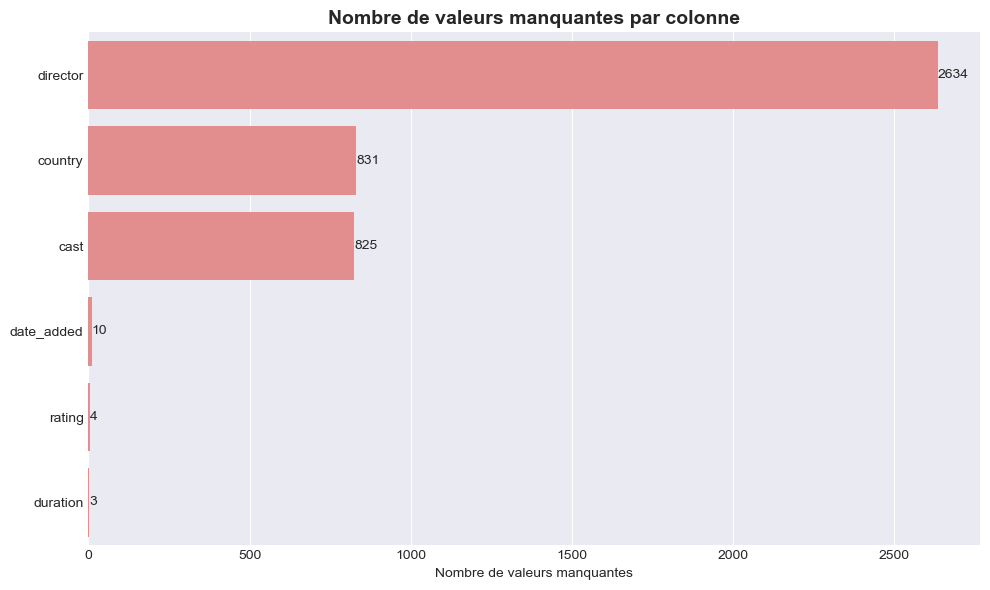

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]
sns.barplot(x=missing_data.values, y=missing_data.index, ax=ax, color='lightcoral')
ax.set_title('Nombre de valeurs manquantes par colonne', fontsize=14, fontweight='bold')
ax.set_xlabel('Nombre de valeurs manquantes')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig('fig1_missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

#### 1.6 Vérification des doublons

In [11]:
duplicates = df.duplicated().sum()
print(f"Nombre de duplicats: {duplicates}")

Nombre de duplicats: 0


### 2. Nettoyage des données

#### 2.1 Conversion de date_added en datetime

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
print("Nettoyage effectué:")
print("- Conversion de 'date_added' en datetime")
print("- Extraction de 'year_added' et 'month_added'")

Nettoyage effectué:
- Conversion de 'date_added' en datetime
- Extraction de 'year_added' et 'month_added'


#### 2.2 Remplissage des valeurs manquantes pour certaines colonnes

In [13]:
df['country'] = df['country'].fillna('Non spécifié')
df['director'] = df['director'].fillna('Non spécifié')
df['cast'] = df['cast'].fillna('Non spécifié')
df['rating'] = df['rating'].fillna('Non classifié')

print("Nettoyage effectué:")
print("- Remplissage des valeurs manquantes pour country, director, cast, rating")


Nettoyage effectué:
- Remplissage des valeurs manquantes pour country, director, cast, rating


### 3. Analyse des contenus

#### 3.1 Films vs Séries

In [14]:
type_counts = df['type'].value_counts()
type_pct = df['type'].value_counts(normalize=True) * 100
print(f"Films: {type_counts['Movie']} ({type_pct['Movie']:.1f}%)")
print(f"Séries: {type_counts['TV Show']} ({type_pct['TV Show']:.1f}%)")

Films: 6131 (69.6%)
Séries: 2676 (30.4%)


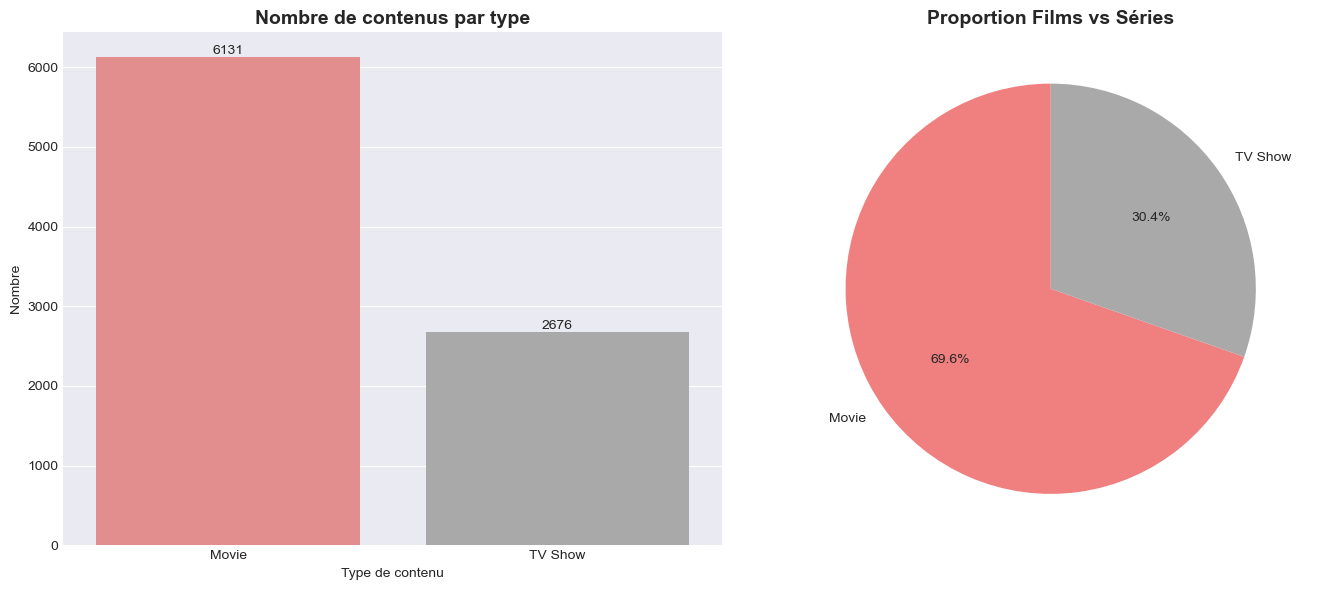

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# Diagramme en barres
sns.countplot(data=df, x='type', ax=axes[0], palette=['lightcoral', 'darkgrey'])
axes[0].set_title('Nombre de contenus par type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Type de contenu')
axes[0].set_ylabel('Nombre')
for container in axes[0].containers:
    axes[0].bar_label(container)

# Diagramme circulaire
colors = ['lightcoral', 'darkgrey']
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Proportion Films vs Séries', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('fig2_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


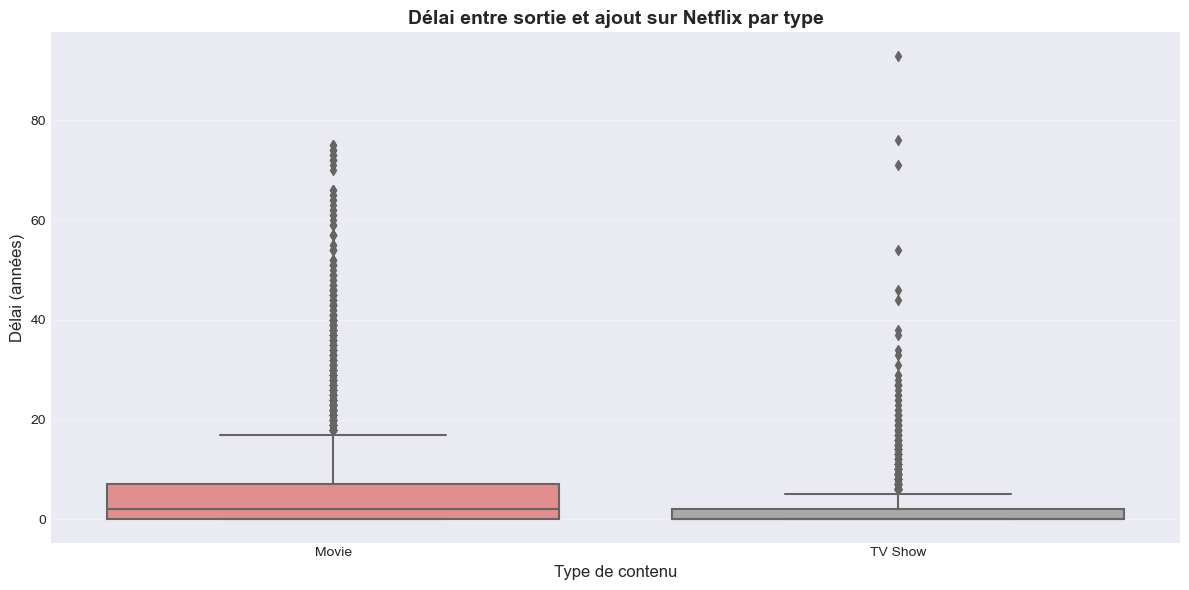

Délai moyen Films: 5.7 ans
Délai moyen Séries: 2.2 ans


In [40]:
# Calculer le délai entre sortie et ajout
df_delay = df.dropna(subset=['year_added', 'release_year'])
df_delay['delay_years'] = df_delay['year_added'] - df_delay['release_year']
df_delay = df_delay[df_delay['delay_years'] >= 0]  # Supprimer les valeurs négatives

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_delay, x='type', y='delay_years',
            palette=['lightcoral', 'darkgrey'])
plt.title('Délai entre sortie et ajout sur Netflix par type',
          fontsize=14, fontweight='bold')
plt.xlabel('Type de contenu', fontsize=12)
plt.ylabel('Délai (années)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('fig_delay_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Délai moyen Films: {df_delay[df_delay['type']=='Movie']['delay_years'].mean():.1f} ans")
print(f"Délai moyen Séries: {df_delay[df_delay['type']=='TV Show']['delay_years'].mean():.1f} ans")

In [41]:
movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_min'] = movies_df['duration'].str.extract('(\d+)').astype(float)

fig = px.histogram(movies_df, x='duration_min', nbins=50,
                   title='Distribution de la durée des films (en minutes)',
                   labels={'duration_min': 'Durée (minutes)', 'count': 'Nombre de films'},
                   color_discrete_sequence=['lightcoral'])
fig.write_html('interactive_duration.html')
fig.show()

#### 3.2 Analyse des genres

In [16]:
# Extraction de tous les genres
all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([g.strip() for g in genres.split(',')])

genre_counts = Counter(all_genres).most_common(15)
print("Top 15 des genres:")
for i, (genre, count) in enumerate(genre_counts, 1):
    print(f"{i}. {genre}: {count}")

Top 15 des genres:
1. International Movies: 2752
2. Dramas: 2427
3. Comedies: 1674
4. International TV Shows: 1351
5. Documentaries: 869
6. Action & Adventure: 859
7. TV Dramas: 763
8. Independent Movies: 756
9. Children & Family Movies: 641
10. Romantic Movies: 616
11. TV Comedies: 581
12. Thrillers: 577
13. Crime TV Shows: 470
14. Kids' TV: 451
15. Docuseries: 395


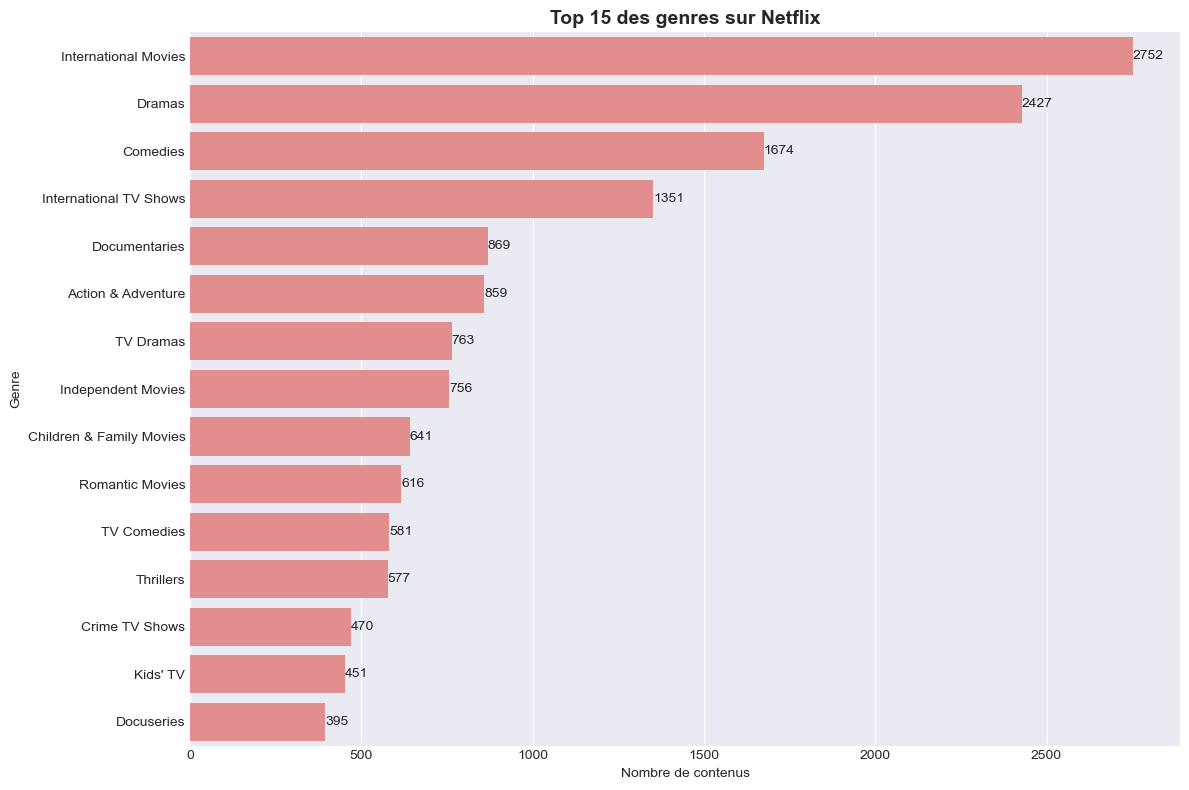

In [17]:
# Visualisation des genres
genres_df = pd.DataFrame(genre_counts, columns=['Genre', 'Count'])
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=genres_df, y='Genre', x='Count', ax=ax, color='lightcoral')
ax.set_title('Top 15 des genres sur Netflix', fontsize=14, fontweight='bold')
ax.set_xlabel('Nombre de contenus')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig('fig3_top_genres.png', dpi=300, bbox_inches='tight')
plt.show()


#### 3.3 Répartition géographique

In [18]:
# Extraction du premier pays mentionné
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else 'Non spécifié')
top_countries = df['primary_country'].value_counts().head(15)
print("Top 15 des pays producteurs:")
print(top_countries)

Top 15 des pays producteurs:
primary_country
United States     3211
India             1008
Non spécifié       831
United Kingdom     628
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Egypt              112
Turkey             111
Germany            103
China              100
Name: count, dtype: int64


In [34]:
country_data = df['primary_country'].value_counts().head(15).reset_index()
country_data.columns = ['Pays', 'Count']
fig = px.bar(country_data, x='Pays', y='Count',
             title='Top 15 des pays producteurs',
             labels={'Count': 'Nombre de contenus'},
             color_discrete_sequence=['lightcoral'])
fig.write_html('interactive_countries.html')
fig.show()

#### 3.4 Casting et Réalisateurs

In [20]:
# Réalisateurs les plus prolifiques
all_directors = []
for directors in df['director'].dropna():
    if directors != 'Non spécifié':
        all_directors.extend([d.strip() for d in directors.split(',')])

director_counts = Counter(all_directors).most_common(10)
print("\nTop 10 des réalisateurs:")
for i, (director, count) in enumerate(director_counts, 1):
    print(f"{i}. {director}: {count} contenus")


Top 10 des réalisateurs:
1. Rajiv Chilaka: 22 contenus
2. Jan Suter: 21 contenus
3. Raúl Campos: 19 contenus
4. Suhas Kadav: 16 contenus
5. Marcus Raboy: 16 contenus
6. Jay Karas: 15 contenus
7. Cathy Garcia-Molina: 13 contenus
8. Youssef Chahine: 12 contenus
9. Martin Scorsese: 12 contenus
10. Jay Chapman: 12 contenus


In [21]:
# Acteurs les plus présents
all_cast = []
for cast in df['cast'].dropna():
    if cast != 'Non spécifié':
        all_cast.extend([c.strip() for c in cast.split(',')])

cast_counts = Counter(all_cast).most_common(10)
print("\nTop 10 des acteurs:")
for i, (actor, count) in enumerate(cast_counts, 1):
    print(f"{i}. {actor}: {count} contenus")


Top 10 des acteurs:
1. Anupam Kher: 43 contenus
2. Shah Rukh Khan: 35 contenus
3. Julie Tejwani: 33 contenus
4. Naseeruddin Shah: 32 contenus
5. Takahiro Sakurai: 32 contenus
6. Rupa Bhimani: 31 contenus
7. Akshay Kumar: 30 contenus
8. Om Puri: 30 contenus
9. Yuki Kaji: 29 contenus
10. Amitabh Bachchan: 28 contenus


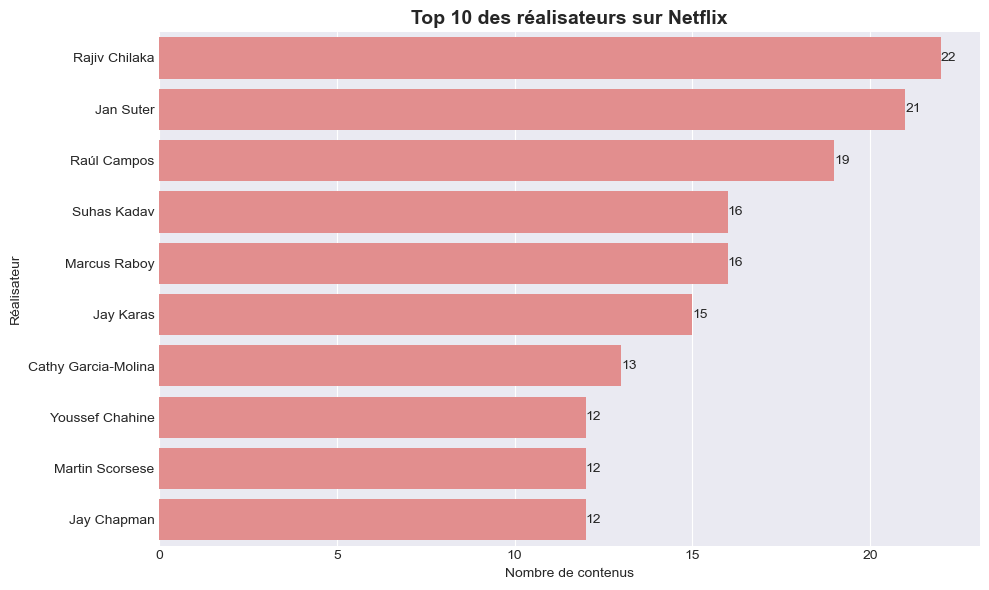

In [22]:
# Visualisation des réalisateurs
directors_df = pd.DataFrame(director_counts, columns=['Réalisateur', 'Count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=directors_df, y='Réalisateur', x='Count', ax=ax, color= 'lightcoral')
ax.set_title('Top 10 des réalisateurs sur Netflix', fontsize=14, fontweight='bold')
ax.set_xlabel('Nombre de contenus')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
plt.savefig('fig5_top_directors.png', dpi=300, bbox_inches='tight')
plt.show()

#### 3.5 Classement des movies et TV Show

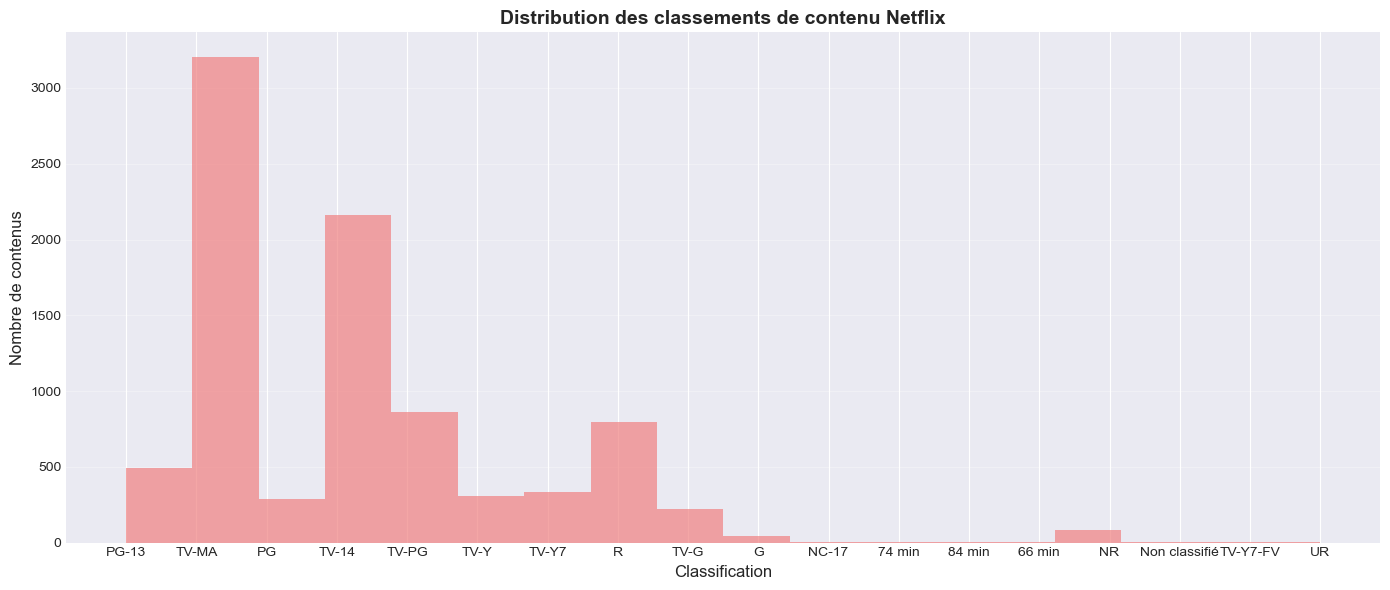

In [38]:
plt.figure(figsize=(14, 6))
rating_counts = df['rating'].value_counts()
plt.hist(df['rating'], bins=len(rating_counts), color='lightcoral', alpha=0.7)
plt.title('Distribution des classements de contenu Netflix',
          fontsize=14, fontweight='bold')
plt.xlabel('Classification', fontsize=12)
plt.ylabel('Nombre de contenus', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('fig_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 4. Analyse temporelle

#### 4.1 Distribution par année de sortie

In [23]:
# Statistiques sur les années de sortie
print(f"Année la plus ancienne: {df['release_year'].min()}")
print(f"Année la plus récente: {df['release_year'].max()}")
print(f"Année médiane: {df['release_year'].median()}")
print(f"Année moyenne: {df['release_year'].mean():.1f}")

Année la plus ancienne: 1925
Année la plus récente: 2021
Année médiane: 2017.0
Année moyenne: 2014.2


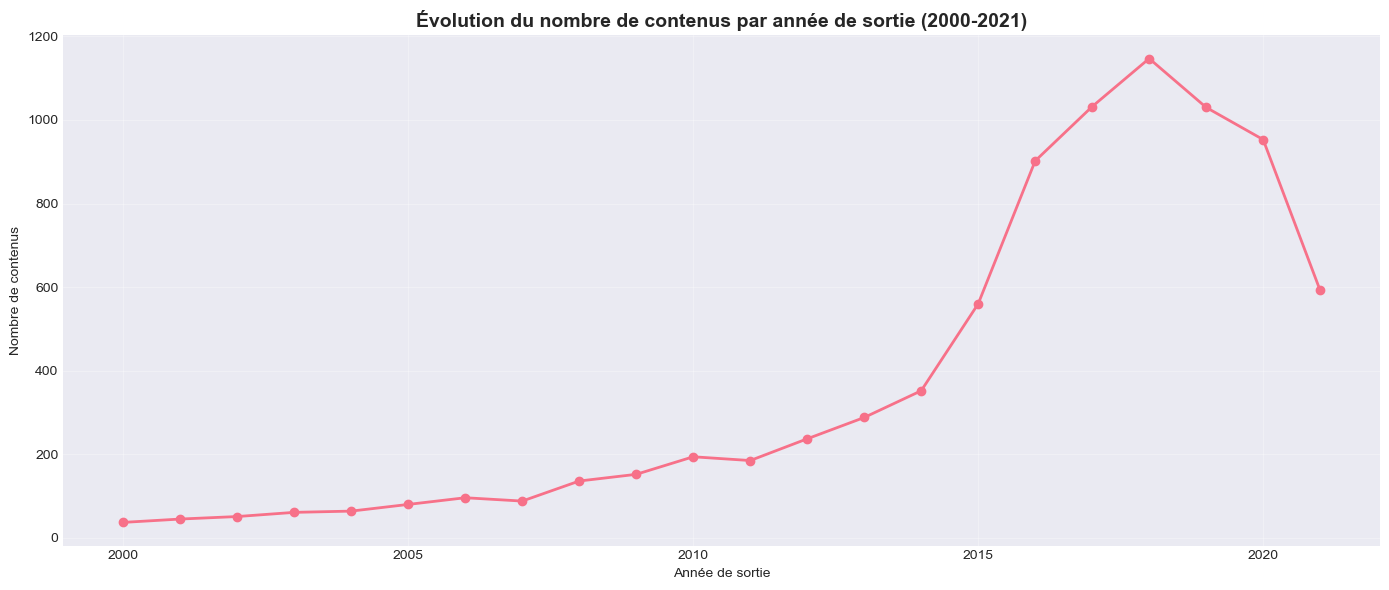

In [24]:
# Distribution des années de sortie (contenus récents)
recent_years = df[df['release_year'] >= 2000]
year_counts = recent_years['release_year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=6)
ax.set_title('Évolution du nombre de contenus par année de sortie (2000-2021)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Année de sortie')
ax.set_ylabel('Nombre de contenus')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('fig6_release_years.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
# Films vs Séries par année
yearly_data = df.groupby(['year_added', 'type']).size().reset_index(name='count')
fig = px.line(yearly_data, x='year_added', y='count', color='type',
              title='Évolution des ajouts de contenus sur Netflix par type',
              labels={'year_added': 'Année', 'count': 'Nombre de contenus', 'type': 'Type'},
              color_discrete_map={'Movie': 'lightcoral', 'TV Show': 'darkgrey'})
fig.write_html('interactive_timeline.html')
fig.show()

#### 4.2 Analyse des dates d'ajout

In [26]:
added_by_year = df['year_added'].value_counts().sort_index()
print("Contenus ajoutés par année:")
print(added_by_year)

Contenus ajoutés par année:
year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


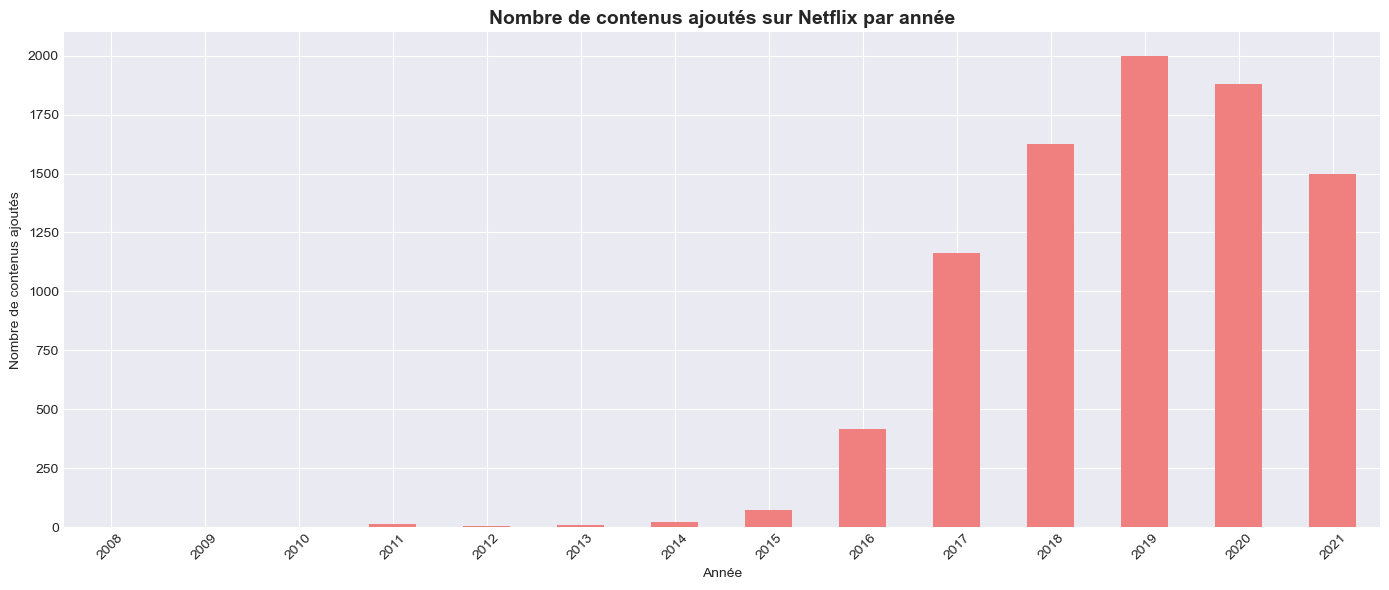

In [27]:
# Visualisation des ajouts par année
fig, ax = plt.subplots(figsize=(14, 6))
added_by_year.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Nombre de contenus ajoutés sur Netflix par année', fontsize=14, fontweight='bold')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de contenus ajoutés')
ax.set_xticklabels([int(label) for label in added_by_year.index], rotation=45)
plt.tight_layout()
plt.savefig('fig8_added_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

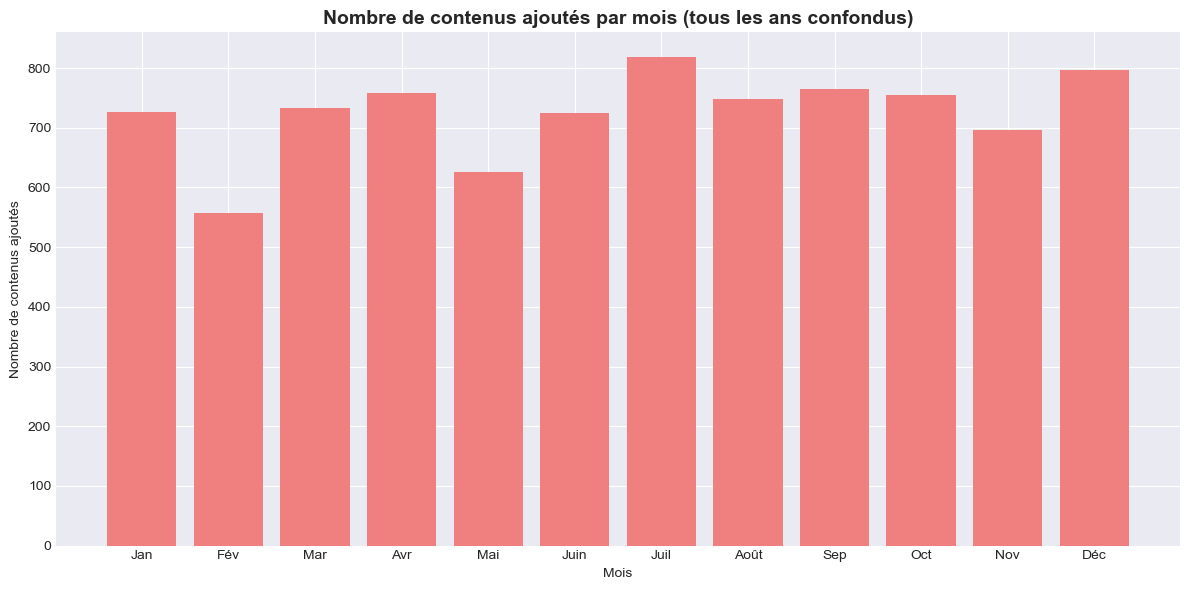

In [28]:
# Analyse par mois
added_by_month = df['month_added'].value_counts().sort_index()
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(range(1, 13), [added_by_month.get(i, 0) for i in range(1, 13)], color='lightcoral')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(month_names)
ax.set_title('Nombre de contenus ajoutés par mois (tous les ans confondus)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de contenus ajoutés')
plt.tight_layout()
plt.savefig('fig9_added_by_month.png', dpi=300, bbox_inches='tight')
plt.show()

### 5. Synthèse des observations

In [32]:
print(f"""
OBSERVATIONS CLÉS:

1. COMPOSITION DU CATALOGUE
   - Total de {len(df)} contenus dans le catalogue Netflix
   - Films: {type_counts['Movie']} ({type_pct['Movie']:.1f}%)
   - Séries: {type_counts['TV Show']} ({type_pct['TV Show']:.1f}%)
   - Les films dominent le catalogue

2. DIVERSITÉ GÉOGRAPHIQUE
   - {len(df['primary_country'].unique())} pays différents représentés
   - Les États-Unis dominent largement la production ({top_countries.iloc[0]} contenus)
   - Présence importante de l'Inde et du Royaume-Uni
   - Diversité croissante avec des contenus internationaux

3. GENRES POPULAIRES
   - Genres principaux: {', '.join([g[0] for g in genre_counts[:3]])}
   - Grande diversité de genres avec {len(set(all_genres))} catégories uniques
   - Les drames internationaux et documentaires sont très présents

4. TENDANCES TEMPORELLES
   - Forte augmentation des contenus depuis 2015
   - Pic d'ajouts en {added_by_year.idxmax()}
   - Concentration sur les contenus récents (post-2000)
   - Ralentissement visible en 2020-2021 (possiblement dû à la pandémie)

5. CRÉATEURS PROLIFIQUES
   - Certains réalisateurs comme {director_counts[0][0]} sont très présents
   - Présence récurrente d'acteurs populaires
   - Diversification des créateurs de contenu

RECOMMANDATIONS:
- Netflix mise sur la diversité géographique et culturelle
- Focus important sur le contenu original et récent
- Stratégie d'expansion internationale visible
- Équilibre entre contenu grand public et niche
""")


OBSERVATIONS CLÉS:

1. COMPOSITION DU CATALOGUE
   - Total de 8807 contenus dans le catalogue Netflix
   - Films: 6131 (69.6%)
   - Séries: 2676 (30.4%)
   - Les films dominent le catalogue

2. DIVERSITÉ GÉOGRAPHIQUE
   - 87 pays différents représentés
   - Les États-Unis dominent largement la production (100 contenus)
   - Présence importante de l'Inde et du Royaume-Uni
   - Diversité croissante avec des contenus internationaux

3. GENRES POPULAIRES
   - Genres principaux: International Movies, Dramas, Comedies
   - Grande diversité de genres avec 42 catégories uniques
   - Les drames internationaux et documentaires sont très présents

4. TENDANCES TEMPORELLES
   - Forte augmentation des contenus depuis 2015
   - Pic d'ajouts en 2019.0
   - Concentration sur les contenus récents (post-2000)
   - Ralentissement visible en 2020-2021 (possiblement dû à la pandémie)

5. CRÉATEURS PROLIFIQUES
   - Certains réalisateurs comme Rajiv Chilaka sont très présents
   - Présence récurrente d'acte